In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ophas_data.csv')

display(df.head())
display(df.tail())

,county,published_date,county_pop,two_week_casecount,metric_date,indicator_1,indicator_1_score,indicator_2,indicator_2_score,indicator_3_three_weeks_ago,...,indicator_6_score,indicator_7_covid,indicator_7_total,indicator_7_score,low_incidence_flag,high_incidence_flag,total_score,color,last_week_score,last_week_color
0,Clinton,2020-11-19,41968,211.0,2020-11-17,502.764011,1,12.00,0,1.0,...,0,0.210356,0.808743,0,No,Yes,2,Red,4,Red
1,Clinton,2020-11-19,41968,211.0,2020-11-16,502.764011,1,16.14,0,1.0,...,0,0.190939,0.810564,0,No,Yes,2,Red,4,Red
2,Clinton,2020-11-19,41968,211.0,2020-11-15,502.764011,1,18.43,0,1.0,...,0,0.186084,0.795992,0,No,Yes,2,Red,4,Red
3,Clinton,2020-11-19,41968,211.0,2020-11-14,502.764011,1,19.00,0,1.0,...,0,0.203883,0.821493,0,No,Yes,2,Red,4,Red
4,Clinton,2020-11-19,41968,211.0,2020-11-13,502.764011,1,19.57,0,1.0,...,0,0.186084,0.812386,0,No,Yes,2,Red,4,Red


,county,published_date,county_pop,two_week_casecount,metric_date,indicator_1,indicator_1_score,indicator_2,indicator_2_score,indicator_3_three_weeks_ago,...,indicator_6_score,indicator_7_covid,indicator_7_total,indicator_7_score,low_incidence_flag,high_incidence_flag,total_score,color,last_week_score,last_week_color
60979,Washington,2020-12-10,59911,518.0,2020-12-04,864.615847,1,50.43,1,0.727273,...,0,0.506667,0.786666,1,No,Yes,4,Red,3,Orange
60980,Washington,2020-12-10,59911,518.0,2020-12-05,864.615847,1,45.43,1,0.727273,...,0,0.513513,0.797297,1,No,Yes,4,Red,3,Orange
60981,Washington,2020-12-10,59911,518.0,2020-12-06,864.615847,1,44.71,1,0.727273,...,0,0.567568,0.864864,1,No,Yes,4,Red,3,Orange
60982,Washington,2020-12-10,59911,518.0,2020-12-07,864.615847,1,34.43,1,0.727273,...,0,0.560000,0.853333,1,No,Yes,4,Red,3,Orange
60983,Washington,2020-12-10,59911,518.0,2020-12-08,864.615847,1,27.29,1,0.727273,...,0,0.511364,0.806818,1,No,Yes,4,Red,3,Orange


In [2]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60984 entries, 0 to 60983
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   county                       60984 non-null  object 
 1   published_date               60984 non-null  object 
 2   county_pop                   60984 non-null  int64  
 3   two_week_casecount           60984 non-null  float64
 4   metric_date                  60984 non-null  object 
 5   indicator_1                  60984 non-null  float64
 6   indicator_1_score            60984 non-null  int64  
 7   indicator_2                  60984 non-null  float64
 8   indicator_2_score            60984 non-null  int64  
 9   indicator_3_three_weeks_ago  60984 non-null  float64
 10  indicator_3_two_weeks_ago    60984 non-null  float64
 11  indicator_3_last_week        60984 non-null  float64
 12  indicator_3_score            60984 non-null  int64  
 13  indicator_4     

None

In [3]:
col_map = {
   'indicator_1':'new_cases_per_capita',
   'indicator_1_score':'new_cases_per_capita_score',
   'indicator_2':'new_cases_increase',
   'indicator_2_score':'new_cases_increase_score',
   'indicator_3_three_weeks_ago':'non_congregate_cases_three_weeks_ago',
   'indicator_3_two_weeks_ago':'non_congregate_cases_two_weeks_ago',
   'indicator_3_last_week':'non_congregate_cases_last_week',
   'indicator_3_score':'non_congregate_cases_score',
   'indicator_4':'ed_visits',
   'indicator_4_score':'ed_visits_score',
   'indicator_5':'outpatient_visits',
   'indicator_5_score':'outpatient_visits_score',
   'indicator_6':'hospital_admissions',
   'indicator_6_score':'hospital_admissions_score',
   'indicator_7_covid':'icu_bed_occupancy_covid',
   'indicator_7_total':'icu_bed_occupancy_total',
   'indicator_7_score':'icu_bed_occupancy_score'
}

df = df.rename(columns=col_map, errors='raise')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60984 entries, 0 to 60983
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   county                                60984 non-null  object 
 1   published_date                        60984 non-null  object 
 2   county_pop                            60984 non-null  int64  
 3   two_week_casecount                    60984 non-null  float64
 4   metric_date                           60984 non-null  object 
 5   new_cases_per_capita                  60984 non-null  float64
 6   new_cases_per_capita_score            60984 non-null  int64  
 7   new_cases_increase                    60984 non-null  float64
 8   new_cases_increase_score              60984 non-null  int64  
 9   non_congregate_cases_three_weeks_ago  60984 non-null  float64
 10  non_congregate_cases_two_weeks_ago    60984 non-null  float64
 11  non_congregate_

None

In [4]:
np.sort(df['published_date'].unique())

array(['2020-07-30', '2020-08-06', '2020-08-13', '2020-08-20',
       '2020-08-27', '2020-09-03', '2020-09-10', '2020-09-17',
       '2020-09-24', '2020-10-01', '2020-10-08', '2020-10-15',
       '2020-10-22', '2020-10-29', '2020-11-05', '2020-11-12',
       '2020-11-19', '2020-11-26', '2020-12-03', '2020-12-10',
       '2020-12-17', '2020-12-24', '2020-12-31', '2021-01-07',
       '2021-01-14', '2021-01-21', '2021-01-28', '2021-02-04',
       '2021-02-11', '2021-02-18', '2021-02-25'], dtype=object)

In [5]:
df.sort_values('metric_date', ascending=False).head(1)

,county,published_date,county_pop,two_week_casecount,metric_date,new_cases_per_capita,new_cases_per_capita_score,new_cases_increase,new_cases_increase_score,non_congregate_cases_three_weeks_ago,...,hospital_admissions_score,icu_bed_occupancy_covid,icu_bed_occupancy_total,icu_bed_occupancy_score,low_incidence_flag,high_incidence_flag,total_score,color,last_week_score,last_week_color
28468,Franklin,2021-02-25,1316756,2476.0,2021-02-23,188.037875,1,169.43,0,0.94941,...,0,0.061489,0.760055,0,No,Yes,2,Red,2,Red


In [6]:
np.sort(df['county'].unique())

array(['Adams', 'Allen', 'Ashland', 'Ashtabula', 'Athens', 'Auglaize',
       'Belmont', 'Brown', 'Butler', 'Carroll', 'Champaign', 'Clark',
       'Clermont', 'Clinton', 'Columbiana', 'Coshocton', 'Crawford',
       'Cuyahoga', 'Darke', 'Defiance', 'Delaware', 'Erie', 'Fairfield',
       'Fayette', 'Franklin', 'Fulton', 'Gallia', 'Geauga', 'Greene',
       'Guernsey', 'Hamilton', 'Hancock', 'Hardin', 'Harrison', 'Henry',
       'Highland', 'Hocking', 'Holmes', 'Huron', 'Jackson', 'Jefferson',
       'Knox', 'Lake', 'Lawrence', 'Licking', 'Logan', 'Lorain', 'Lucas',
       'Madison', 'Mahoning', 'Marion', 'Medina', 'Meigs', 'Mercer',
       'Miami', 'Monroe', 'Montgomery', 'Morgan', 'Morrow', 'Muskingum',
       'Noble', 'Ottawa', 'Paulding', 'Perry', 'Pickaway', 'Pike',
       'Portage', 'Preble', 'Putnam', 'Richland', 'Ross', 'Sandusky',
       'Scioto', 'Seneca', 'Shelby', 'Stark', 'Summit', 'Trumbull',
       'Tuscarawas', 'Union', 'Van Wert', 'Vinton', 'Warren',
       'Washington

In [13]:
df['metric_date'] = pd.to_datetime(df['metric_date'])
df['published_date'] = pd.to_datetime(df['published_date'])

In [42]:
df['icu_bed_occupancy_total'].describe()

count    20328.000000
mean         0.712548
std          0.101270
min          0.363636
25%          0.636363
50%          0.731250
75%          0.791722
max          0.907073
Name: icu_bed_occupancy_total, dtype: float64

In [45]:
print("Highest ED Visits:")
display(df[df['ed_visits']==max(df['ed_visits'])][['metric_date', 'county', 'ed_visits']])
print("Highest ICU Occupancy:")
display(df[df['icu_bed_occupancy_total']==max(df['icu_bed_occupancy_total'])][['metric_date', 'county', 'icu_bed_occupancy_total']])

Highest ED Visits:


,metric_date,county,ed_visits
23640,2020-12-10,Cuyahoga,160.86


Highest ICU Occupancy:


,metric_date,county,icu_bed_occupancy_total
4168,2020-11-24,Knox,0.907073
4327,2020-11-24,Logan,0.907073
4384,2020-11-24,Marion,0.907073
4544,2020-11-24,Madison,0.907073
4725,2020-11-24,Delaware,0.907073
4737,2020-11-24,Fayette,0.907073
4767,2020-11-24,Hardin,0.907073
4789,2020-11-24,Licking,0.907073
4829,2020-11-24,Pickaway,0.907073
19580,2020-11-24,Wyandot,0.907073


In [64]:
maxs = df.groupby('metric_date').max()
avgs = df.groupby('metric_date').mean()

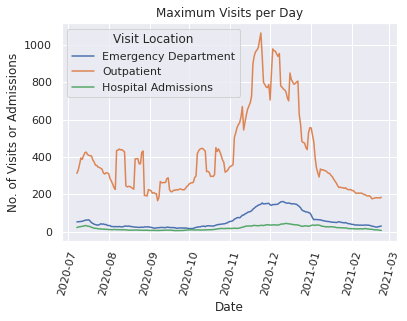

In [65]:
plt.plot(maxs['ed_visits'], label='Emergency Department')
plt.plot(maxs['outpatient_visits'], label='Outpatient')
plt.plot(maxs['hospital_admissions'], label='Hospital Admissions')
plt.title('Maximum Visits per Day')
plt.xlabel('Date')
plt.ylabel('No. of Visits or Admissions')
plt.legend(title='Visit Location')
plt.xticks(rotation=75)
plt.show()

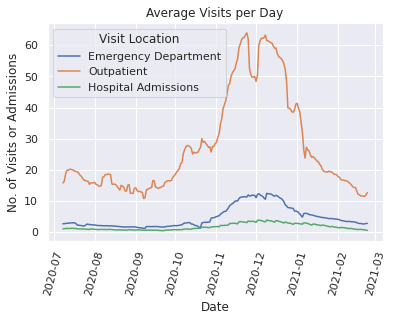

In [66]:
plt.plot(avgs['ed_visits'], label='Emergency Department')
plt.plot(avgs['outpatient_visits'], label='Outpatient')
plt.plot(avgs['hospital_admissions'], label='Hospital Admissions')
plt.title('Average Visits per Day')
plt.xlabel('Date')
plt.ylabel('No. of Visits or Admissions')
plt.legend(title='Visit Location')
plt.xticks(rotation=75)
plt.show()

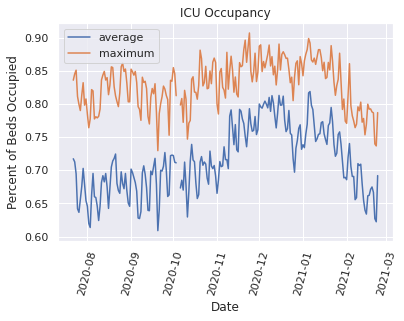

In [67]:
plt.plot(avgs['icu_bed_occupancy_total'], label='average')
plt.plot(maxs['icu_bed_occupancy_total'], label='maximum')
plt.title('ICU Occupancy')
plt.xlabel('Date')
plt.ylabel('Percent of Beds Occupied')
plt.legend()
plt.xticks(rotation=75)
plt.show()

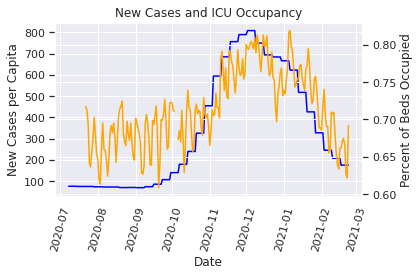

In [89]:
fig, ax1 = plt.subplots()

color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases per Capita')
ax1.yaxis.set_major_locator(plt.FixedLocator([0,100,200,300,400,500,600,700,800,900]))
ax1.plot(avgs['new_cases_per_capita'], label='new cases per capita', color=color)
ax1.tick_params(axis='x', rotation=75)

ax2 = ax1.twinx()

color = 'orange'
ax2.set_ylabel('Percent of Beds Occupied')
ax2.plot(avgs['icu_bed_occupancy_total'], label='icu occupancy', color=color)
# ax2.set_ylim(ymin=0)

plt.title('New Cases and ICU Occupancy')
fig.tight_layout()
plt.show()

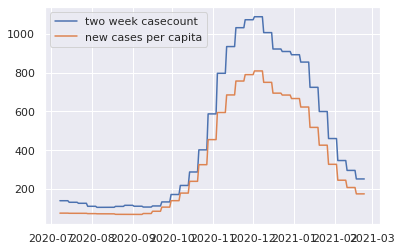

In [94]:
plt.plot(avgs['two_week_casecount'], label='two week casecount')
plt.plot(avgs['new_cases_per_capita'], label='new cases per capita')
plt.legend()
plt.show()

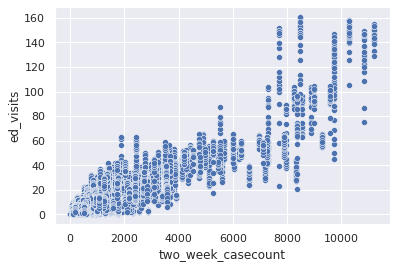

In [91]:
sns.scatterplot(x='two_week_casecount', y='ed_visits', data=df)
plt.show()

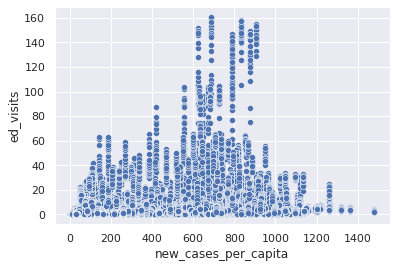

In [92]:
sns.scatterplot(x='new_cases_per_capita', y='ed_visits', data=df)
plt.show()

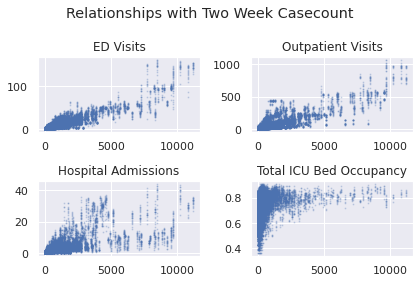

In [106]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(df['two_week_casecount'], df['ed_visits'], marker='o', markersize=1, alpha=0.2, linestyle='None')
ax[0, 0].set_title('ED Visits')

ax[0, 1].plot(df['two_week_casecount'], df['outpatient_visits'], marker='o', markersize=1, alpha=0.2, linestyle='None')
ax[0, 1].set_title('Outpatient Visits')

ax[1, 0].plot(df['two_week_casecount'], df['hospital_admissions'], marker='o', markersize=1, alpha=0.2, linestyle='None')
ax[1, 0].set_title('Hospital Admissions')

ax[1, 1].plot(df['two_week_casecount'], df['icu_bed_occupancy_total'], marker='o', markersize=1, alpha=0.2, linestyle='None')
ax[1, 1].set_title('Total ICU Bed Occupancy')

fig.suptitle('Relationships with Two Week Casecount')
fig.tight_layout()
plt.show()

In [108]:
franklin = df[df['county']=='Franklin']
franklin.shape

(693, 28)

In [110]:
franklin[franklin['published_date']=='2021-02-11'][['published_date', 'metric_date', 'two_week_casecount', 'new_cases_per_capita']].sort_values('metric_date')

,published_date,metric_date,two_week_casecount,new_cases_per_capita
5124,2021-02-11,2021-01-20,4122.0,313.042052
5122,2021-02-11,2021-01-21,4122.0,313.042052
2046,2021-02-11,2021-01-22,4122.0,313.042052
2045,2021-02-11,2021-01-23,4122.0,313.042052
2037,2021-02-11,2021-01-24,4122.0,313.042052
2036,2021-02-11,2021-01-25,4122.0,313.042052
2035,2021-02-11,2021-01-26,4122.0,313.042052
2034,2021-02-11,2021-01-27,4122.0,313.042052
2042,2021-02-11,2021-01-28,4122.0,313.042052
2043,2021-02-11,2021-01-29,4122.0,313.042052


In [113]:
franklin_cases = franklin.groupby('published_date').mean()['new_cases_per_capita']
display(franklin_cases)

published_date
2020-07-30    184.316608
2020-08-06    142.471346
2020-08-13    126.750894
2020-08-20    109.359669
2020-08-27     95.006212
2020-09-03    113.916322
2020-09-10    158.419631
2020-09-17    153.103536
2020-09-24    121.358855
2020-10-01     99.942586
2020-10-08    109.587501
2020-10-15    126.447117
2020-10-22    153.711090
2020-10-29    193.961524
2020-11-05    267.171746
2020-11-12    419.060175
2020-11-19    553.101714
2020-11-26    674.004903
2020-12-03    626.691657
2020-12-10    726.406411
2020-12-17    726.710188
2020-12-24    682.890376
2020-12-31    648.259814
2021-01-07    634.286079
2021-01-14    704.914198
2021-01-21    597.529079
2021-01-28    550.215833
2021-02-04    414.655411
2021-02-11    313.042052
2021-02-18    246.590864
2021-02-25    188.037875
Name: new_cases_per_capita, dtype: float64

In [116]:
lucas = df[df['county']=='Lucas']
sandusky = df[df['county']=='Sandusky']
ottawa = df[df['county']=='Ottawa']

lucas_cases = lucas.groupby('published_date').mean()['new_cases_per_capita']
sandusky_cases = sandusky.groupby('published_date').mean()['new_cases_per_capita']
ottawa_cases = ottawa.groupby('published_date').mean()['new_cases_per_capita']

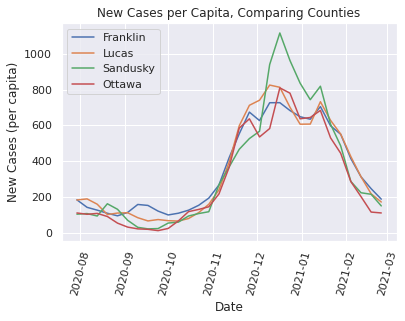

In [119]:
plt.plot(franklin_cases, label='Franklin')
plt.plot(lucas_cases, label='Lucas')
plt.plot(sandusky_cases, label='Sandusky')
plt.plot(ottawa_cases, label='Ottawa')
plt.legend()
plt.title('New Cases per Capita, Comparing Counties')
plt.xlabel('Date')
plt.ylabel('New Cases (per capita)')
plt.xticks(rotation=75)
plt.show()

In [124]:
sandusky_cases[sandusky_cases==max(sandusky_cases)]

published_date
2020-12-17    1115.895964
Name: new_cases_per_capita, dtype: float64